### Introduction to data set

The aim of this project is to build a k-nearest-neighbours model to predict car prices

In [1]:
# Let's import the necessary modules, set pandas options and import the data set

import pandas as pd
import numpy as np

pd.options.display.max_columns = 30

cars = pd.read_csv("imports-85.data")

cars

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
6,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
8,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.00,160,5500,16,22,?
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.80,101,5800,23,29,16430


### Data cleaning

Immediately we can see that the column names are not what we expected from the [source](https://archive.ics.uci.edu/ml/datasets/automobile). Thus let's clean up the column names to make the data easier to work with.

Column names and descriptions as per [the data source](https://archive.ics.uci.edu/ml/datasets/automobile):

1. symboling: -3, -2, -1, 0, 1, 2, 3. 
2. normalized-losses: continuous from 65 to 256. 
3. make: 
alfa-romero, audi, bmw, chevrolet, dodge, honda, 
isuzu, jaguar, mazda, mercedes-benz, mercury, 
mitsubishi, nissan, peugot, plymouth, porsche, 
renault, saab, subaru, toyota, volkswagen, volvo 

4. fuel-type: diesel, gas. 
5. aspiration: std, turbo. 
6. num-of-doors: four, two. 
7. body-style: hardtop, wagon, sedan, hatchback, convertible. 
8. drive-wheels: 4wd, fwd, rwd. 
9. engine-location: front, rear. 
10. wheel-base: continuous from 86.6 120.9. 
11. length: continuous from 141.1 to 208.1. 
12. width: continuous from 60.3 to 72.3. 
13. height: continuous from 47.8 to 59.8. 
14. curb-weight: continuous from 1488 to 4066. 
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor. 
16. num-of-cylinders: eight, five, four, six, three, twelve, two. 
17. engine-size: continuous from 61 to 326. 
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi. 
19. bore: continuous from 2.54 to 3.94. 
20. stroke: continuous from 2.07 to 4.17. 
21. compression-ratio: continuous from 7 to 23. 
22. horsepower: continuous from 48 to 288. 
23. peak-rpm: continuous from 4150 to 6600. 
24. city-mpg: continuous from 13 to 49. 
25. highway-mpg: continuous from 16 to 54. 
26. price: continuous from 5118 to 45400.



In [2]:
columns = ["symboling","normalized_losses","make","fuel_type","aspiration","num_of_doors","body_style"
            ,"drive_wheels","engine_location","wheel_base","length","width","height","curb_weight"
            ,"engine_type","num_of_cylinders","engine_size","fuel_system","bore","stroke","compression_ratio"
            ,"horsepower","peak_rpm","city_mpg","highway_mpg","price"]

# Let's check that we've created the list properly. i.e. The number of names as per the above list
# matches the number of columns in the dataframe
len(columns) - len(cars.columns)

0

In [3]:
# As that was a success, let's set the df column names equal to columns
cars.columns = columns

In [4]:
cars.head(20)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
6,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
8,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


As we will be using the k-nearest-neighbours model to make our predictions, we need to limit out dataset to only continuous values

In [5]:
# As we will be using the k-nearest-neighbours model to make our predictions, we need to limit 
# our dataset to only continuous values

numeric_cars = cars[["normalized_losses","wheel_base","length","width","height","curb_weight","bore","stroke","compression_ratio"
            ,"horsepower","peak_rpm","city_mpg","highway_mpg","price"]]

We usually can't have any missing values if we want to use them for predictive modeling. Based on the data set preview from the last step, we can tell that the normalized-losses column contains missing values represented using "?". Let's replace these values and look for the presence of missing values in other numeric columns. Let's also rescale the values in the numeric columns so they all range from 0 to 1.

In [6]:
numeric_cars = numeric_cars.replace("?", np.nan)

numeric_cars.head(10)

,normalized_losses,wheel_base,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
1,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
2,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
3,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450
4,NaN,99.8,177.3,66.3,53.1,2507,3.19,3.40,8.5,110,5500,19,25,15250
5,158,105.8,192.7,71.4,55.7,2844,3.19,3.40,8.5,110,5500,19,25,17710
6,NaN,105.8,192.7,71.4,55.7,2954,3.19,3.40,8.5,110,5500,19,25,18920
7,158,105.8,192.7,71.4,55.9,3086,3.13,3.40,8.3,140,5500,17,20,23875
8,NaN,99.5,178.2,67.9,52.0,3053,3.13,3.40,7.0,160,5500,16,22,NaN
9,192,101.2,176.8,64.8,54.3,2395,3.50,2.80,8.8,101,5800,23,29,16430


In [7]:
numeric_cars.isna().sum()

normalized_losses    40
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

The fact that some columns contained "?" means that some columns were classified by pandas as an object type when they otherwise would have been classified as a numeric type. Let's now convert these columns to the Float type.

In [8]:
numeric_cars[["normalized_losses","bore","stroke","horsepower","peak_rpm","price"]] = numeric_cars[["normalized_losses","bore","stroke","horsepower","peak_rpm","price"]].astype(float)

numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 14 columns):
normalized_losses    164 non-null float64
wheel_base           204 non-null float64
length               204 non-null float64
width                204 non-null float64
height               204 non-null float64
curb_weight          204 non-null int64
bore                 200 non-null float64
stroke               200 non-null float64
compression_ratio    204 non-null float64
horsepower           202 non-null float64
peak_rpm             202 non-null float64
city_mpg             204 non-null int64
highway_mpg          204 non-null int64
price                200 non-null float64
dtypes: float64(11), int64(3)
memory usage: 22.4 KB


Now let's determine what to do with the NaN values. We could:

- drop the row
- drop the column
- replace the value with the column mean

Let's drop all NaN values in the price column as that is the column we want to predict and replace all the rest with the mean

In [9]:
numeric_cars = numeric_cars.dropna(subset=["price"])

numeric_cars.isna().sum()

normalized_losses    36
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

In [10]:
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

numeric_cars.isna().sum()

normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [11]:
numeric_cars.index = range(numeric_cars.shape[0])

numeric_cars.head(10)

,normalized_losses,wheel_base,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
1,122.0,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
2,164.0,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
3,164.0,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
4,122.0,99.8,177.3,66.3,53.1,2507,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
5,158.0,105.8,192.7,71.4,55.7,2844,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
6,122.0,105.8,192.7,71.4,55.7,2954,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
7,158.0,105.8,192.7,71.4,55.9,3086,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
8,192.0,101.2,176.8,64.8,54.3,2395,3.50,2.80,8.8,101.0,5800.0,23,29,16430.0
9,192.0,101.2,176.8,64.8,54.3,2395,3.50,2.80,8.8,101.0,5800.0,23,29,16925.0


Now let's normalise the columns except for the target column

In [12]:
# Set a column for the price so we can replace it after it is normalized
price_col = numeric_cars["price"]

# Normalise the df
numeric_cars = (numeric_cars - numeric_cars.min()) / (numeric_cars.max() - numeric_cars.min())

# Replace the normalized price column with the original values
numeric_cars["price"] = price_col

numeric_cars.head(10)

,normalized_losses,wheel_base,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.12500,0.294393,0.346939,0.222222,0.289474,16500.0
1,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.12500,0.495327,0.346939,0.166667,0.263158,16500.0
2,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.18750,0.252336,0.551020,0.305556,0.368421,13950.0
3,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.06250,0.313084,0.551020,0.138889,0.157895,17450.0
4,0.298429,0.384840,0.540299,0.512821,0.441667,0.395268,0.464286,0.633333,0.09375,0.289720,0.551020,0.166667,0.236842,15250.0
5,0.486911,0.559767,0.770149,0.948718,0.658333,0.525989,0.464286,0.633333,0.09375,0.289720,0.551020,0.166667,0.236842,17710.0
6,0.298429,0.559767,0.770149,0.948718,0.658333,0.568658,0.464286,0.633333,0.09375,0.289720,0.551020,0.166667,0.236842,18920.0
7,0.486911,0.559767,0.770149,0.948718,0.675000,0.619860,0.421429,0.633333,0.08125,0.429907,0.551020,0.111111,0.105263,23875.0
8,0.664921,0.425656,0.532836,0.384615,0.541667,0.351823,0.685714,0.347619,0.11250,0.247664,0.673469,0.277778,0.342105,16430.0
9,0.664921,0.425656,0.532836,0.384615,0.541667,0.351823,0.685714,0.347619,0.11250,0.247664,0.673469,0.277778,0.342105,16925.0


### Univariate model

In [13]:
# Let's first build a simple model to find the single colum that best explains the price

from sklearn.neighbors import KNeighborsRegressor
from math import ceil
from sklearn.metrics import mean_squared_error

def knn_train_test(target_column, dataframe):
    """Returns a dictionary with the rmse value for each test column"""
    # Set the random seed to assist with replicatibility
    np.random.seed(1)
    # create an empty dictionary that will eventually be returned
    rmses = {}
    # Shuffle the dataframe to eliminate ordering bias
    df = dataframe.loc[np.random.permutation(dataframe.shape[0])]
    # Dind how many observations constiture 75% of the dataset
    train_len = ceil(df.shape[0] * 0.75) + 1
    # Create the train and test dataframes
    train = df.iloc[:train_len]
    test = df.iloc[train_len:]
    # Create for loop to loop over each column
    for training_column in dataframe.columns[:-1]:
        # Initialize the knn model
        knn = KNeighborsRegressor()
        # Fit the model
        knn.fit(train[[training_column]], train[target_column])
        # Make a prediction
        prediction = knn.predict(test[[training_column]])
        # Calculate the rmse value
        rmse = mean_squared_error(test[target_column], prediction) ** (1/2)
        # Add value to the dictionary
        rmses[training_column] = rmse
    # return the dictionary
    return rmses

    
knn_train_test("price", numeric_cars)

{'normalized_losses': 6186.795836097311,
 'wheel_base': 5331.792479235539,
 'length': 4356.850738872785,
 'width': 3219.1089224650163,
 'height': 6835.824022346523,
 'curb_weight': 2437.2576554774987,
 'bore': 8154.945672162285,
 'stroke': 6763.641786819298,
 'compression_ratio': 7597.639520970461,
 'horsepower': 5450.355023898041,
 'peak_rpm': 7085.191789664309,
 'city_mpg': 3264.245772684679,
 'highway_mpg': 3237.6095282079427}

As we can see from the above output, `curb-weight` seems to be the best predictor of price, followed by `width`, `highway_mpg` and `city_mpg`.

Let's imporve our model by adding varying k values.

In [14]:
def knn_train_test_k(target_column,n_neighbors_list, dataframe):
    """Returns a dictionary with a dictionary of rmse values for each k value"""
    # Set the random seed to assist with replicatibility
    np.random.seed(1)
    # create an empty dictionary that will eventually be returned
    rmses = {}
    # Shuffle the dataframe to eliminate ordering bias
    df = dataframe.loc[np.random.permutation(dataframe.shape[0])]
    # Find how many observations constiture 75% of the dataset
    train_len = ceil(df.shape[0] * 0.75) + 1
    # Create the train and test dataframes
    train = df.iloc[:train_len]
    test = df.iloc[train_len:]
    # Create for loop to loop over each column
    for training_column in dataframe.columns[:-1]:
        # Create outer dictionary
        rmses[training_column] = {}
        # Create a for loop to loop over the k values list
        for n_neighbors in n_neighbors_list:
            # Initialize the knn model
            knn = KNeighborsRegressor(n_neighbors = n_neighbors)
            # Fit the model
            knn.fit(train[[training_column]], train[target_column])
            # Make a prediction
            prediction = knn.predict(test[[training_column]])
            # Calculate the rmse value
            rmse = mean_squared_error(test[target_column], prediction) ** (1/2)
            # Add value to inner dictionary
            rmses[training_column][n_neighbors] = rmse    
    # return the dictionary
    return rmses

results = knn_train_test_k("price", [1,3,5,7,9], numeric_cars)

results

{'normalized_losses': {1: 5577.523148261041,
  3: 6047.583951529209,
  5: 6186.795836097311,
  7: 6338.37615589574,
  9: 6788.717651551119},
 'wheel_base': {1: 4681.20093391359,
  3: 4904.2148973752355,
  5: 5331.792479235539,
  7: 5302.163023328076,
  9: 5349.18057459289},
 'length': {1: 4744.842286792114,
  3: 4528.834448823737,
  5: 4356.850738872785,
  7: 4404.8931182463075,
  9: 4472.3090147773055},
 'width': {1: 3235.4655407384766,
  3: 3105.6959192517775,
  5: 3219.1089224650163,
  7: 3315.335264286089,
  9: 3057.4710354767117},
 'height': {1: 6456.210852460487,
  3: 7283.273122620406,
  5: 6835.824022346523,
  7: 6754.540771861094,
  9: 6715.6528136908455},
 'curb_weight': {1: 3645.826926719347,
  3: 2480.4530303611205,
  5: 2437.2576554774987,
  7: 2339.2460138620368,
  9: 2366.640533959817},
 'bore': {1: 11241.082824231147,
  3: 10133.465032374577,
  5: 8154.945672162285,
  7: 7448.033510398007,
  9: 7363.293617085252},
 'stroke': {1: 9082.467863405624,
  3: 6889.335075979077

In [15]:
import matplotlib.pyplot as plt

for attribute, inner_dict in results.items():
    plt.plot(inner_dict.keys(), inner_dict.values(), label=attribute)
    plt.legend(bbox_to_anchor=(1,1))
    
plt.show()
        

<Figure size 640x480 with 1 Axes>

In [16]:
# Compute the average for each attribute
from statistics import mean

avg_rmses = {}
for attribute, inner_dict in results.items():
    avg_rmses[attribute] = mean(inner_dict.values())

# Create a Series object from the dictionary so 
# we can easily view the results, sort, etc
rmse_results_series = pd.Series(avg_rmses)
rmse_results_series.sort_values()

curb_weight          2653.884832
width                3186.615336
city_mpg             3510.190024
highway_mpg          3540.948372
length               4501.545922
horsepower           5000.473567
wheel_base           5113.710382
normalized_losses    6187.799349
peak_rpm             6765.273602
height               6809.100317
stroke               7246.216386
compression_ratio    7926.605150
bore                 8868.164131
dtype: float64

### Multivatiate model

In [17]:
def knn_train_test_multi(target_column, dataframe, num_of_cats=4):
    """Returns rmse values for multivariate combinations of the first through num_of_cats best categories"""
    # Set the random seed to assist with replicatibility
    np.random.seed(1)
    # create an empty dictionary that will eventually be returned
    rmses = {}
    # Shuffle the dataframe to eliminate ordering bias
    df = dataframe.loc[np.random.permutation(dataframe.shape[0])]
    # Find how many observations constiture 75% of the dataset
    train_len = ceil(df.shape[0] * 0.75) + 1
    # Create the train and test dataframes
    train = df.iloc[:train_len]
    test = df.iloc[train_len:]
    # Create function to loop through attributes and return rmse values to a specified dict
    def calculate_rmses(output_dict):
        for training_column in dataframe.columns[:-1]:
            # Initialize the knn model
            knn = KNeighborsRegressor()
            # Fit the model
            knn.fit(train[[training_column]], train[target_column])
            # Make a prediction
            prediction = knn.predict(test[[training_column]])
            # Calculate the rmse value
            rmse = mean_squared_error(test[target_column], prediction) ** (1/2)
            # Add value to the dictionary
            output_dict[training_column] = rmse
    # Use the calculate_rmses function to calculate rmses
    calculate_rmses(rmses)
    # Convert the dictionary into a dataframe
    rmses = pd.Series(rmses)
    # Order the dataframe by rmse and segment the top num_of_cats
    top_rmses_sorted = rmses.sort_values()[:num_of_cats]
    # For each combination of the top columns (first, second), (first,second,third), etc.
    # train a new knn model and eventually output the values for 2_best, 3 best_, etc.
    multi_dict = {}
    for x in range(1, num_of_cats+1):
            # Initialize the knn model
            knn = KNeighborsRegressor()
            # Fit the model
            knn.fit(train[top_rmses_sorted.keys()[:x]], train[target_column])
            # Make a prediction
            prediction = knn.predict(test[top_rmses_sorted.keys()[:x]])
            # Calculate the rmse value
            rmse = mean_squared_error(test[target_column], prediction) ** (1/2)
            # Add value to the dictionary
            multi_dict[f"{x}_top"] = rmse
    return multi_dict
    
knn_train_test_multi("price", numeric_cars, num_of_cats = 4)       
        
        
    

{'1_top': 2437.2576554774987,
 '2_top': 2644.6183120304017,
 '3_top': 3526.5979795530643,
 '4_top': 2554.7095816414458}

In [18]:
# Now lets create another multivariate model where we vary the k value

def knn_train_test_multi(target_column, dataframe, num_of_cats=4, k=5):
    """Returns rmse values for multivariate combinations of the first through num_of_cats best categories"""
    # Set the random seed to assist with replicatibility
    np.random.seed(1)
    # create an empty dictionary that will eventually be returned
    rmses = {}
    # Shuffle the dataframe to eliminate ordering bias
    df = dataframe.loc[np.random.permutation(dataframe.shape[0])]
    # Find how many observations constiture 75% of the dataset
    train_len = ceil(df.shape[0] * 0.75) + 1
    # Create the train and test dataframes
    train = df.iloc[:train_len]
    test = df.iloc[train_len:]
    # Create function to loop through attributes and return rmse values to a specified dict
    def calculate_rmses(output_dict):
        for training_column in dataframe.columns[:-1]:
            # Initialize the knn model
            knn = KNeighborsRegressor()
            # Fit the model
            knn.fit(train[[training_column]], train[target_column])
            # Make a prediction
            prediction = knn.predict(test[[training_column]])
            # Calculate the rmse value
            rmse = mean_squared_error(test[target_column], prediction) ** (1/2)
            # Add value to the dictionary
            output_dict[training_column] = rmse
    # Use the calculate_rmses function to calculate rmses
    calculate_rmses(rmses)
    # Convert the dictionary into a dataframe
    rmses = pd.Series(rmses)
    # Order the dataframe by rmse and segment the top num_of_cats
    top_rmses_sorted = rmses.sort_values()[:num_of_cats]
    # For each combination of the top columns (first, second), (first,second,third), etc.
    # train a new knn model and eventually output the values for 2_best, 3 best_, etc.
    multi_dict = {}
    for x in range(1, num_of_cats+1):
        multi_dict[f"{x}_top"] = {}
        for k in range(1,k+1):
            # Initialize the knn model
            knn = KNeighborsRegressor(n_neighbors = k)
            # Fit the model
            knn.fit(train[top_rmses_sorted.keys()[:x]], train[target_column])
            # Make a prediction
            prediction = knn.predict(test[top_rmses_sorted.keys()[:x]])
            # Calculate the rmse value
            rmse = mean_squared_error(test[target_column], prediction) ** (1/2)
            # Add value to the dictionary
            multi_dict[f"{x}_top"][k] = rmse
    return multi_dict
    
results_multi = knn_train_test_multi("price", numeric_cars, num_of_cats = 4, k=25) 

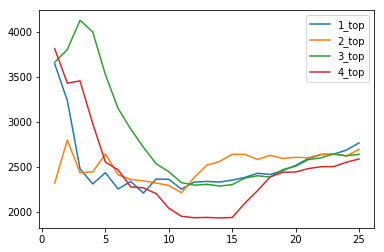

In [19]:
for attribute, inner_dict in results_multi.items():
    plt.plot(inner_dict.keys(), inner_dict.values(), label=attribute)
    plt.legend(bbox_to_anchor=(1,1))
    
plt.show()

In [20]:
# Let's find our lowest rmse at 4_top, k=14:
results_multi["4_top"][14]

1934.9835094923928